## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [4]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-12-09 15:55:33--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 108.177.96.113, 108.177.96.101, 108.177.96.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-12-09 15:55:33--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  

In [5]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [6]:
data_df['date'] = data_df['date'].str.replace('T000000','')                                         # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_array = data_df.drop(columns=['id']).values.astype(float)                                            # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [7]:
import numpy as np
mean = np.mean(data_array,axis=0)                                  # this should be an array, each entry should be mean of a column
sd = np.std(data_array,axis=0)                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [8]:
labels=  data_df['price']                                                                                                 # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,1)                                                                                                      # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [51]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse =np.mean(np.dot((y_pred-y_true),(y_pred-y_true)))                     # fill code here

  return mse

In [52]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a)+b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [53]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da = 2/m* np.dot(x.T,(yp-y_true))              # write code to calculate derivative of loss with respect to a
  db = 2/m* np.sum(yp-y_true)              # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [55]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a =np.zeros(n)                                    # initialize a- weights and b- bias
  b =0.0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    grad=gradient(x,a,b,y_true)
    a=a-learning_rate*grad[0]
    b=b-learning_rate*grad[1]

    l_mse =loss(y(x,a,b),y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [57]:
epochs =  2000         # tweak this!!!
learn_rate =0.001       # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learning_rate=learn_rate,epochs=epochs)

Epoch  1  Completed! loss =  7694766804109328.0
Epoch  2  Completed! loss =  7649741850991585.0
Epoch  3  Completed! loss =  7605230169477018.0
Epoch  4  Completed! loss =  7561223028912002.0
Epoch  5  Completed! loss =  7517711869895663.0
Epoch  6  Completed! loss =  7474688300787806.0
Epoch  7  Completed! loss =  7432144094288816.0
Epoch  8  Completed! loss =  7390071184090031.0
Epoch  9  Completed! loss =  7348461661593176.0
Epoch  10  Completed! loss =  7307307772697382.0
Epoch  11  Completed! loss =  7266601914652414.0
Epoch  12  Completed! loss =  7226336632976754.0
Epoch  13  Completed! loss =  7186504618439156.0
Epoch  14  Completed! loss =  7147098704102406.0
Epoch  15  Completed! loss =  7108111862427969.0
Epoch  16  Completed! loss =  7069537202440279.0
Epoch  17  Completed! loss =  7031367966949426.0
Epoch  18  Completed! loss =  6993597529831064.0
Epoch  19  Completed! loss =  6956219393362312.0
Epoch  20  Completed! loss =  6919227185612517.0
Epoch  21  Completed! loss = 

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  156224520796636.1


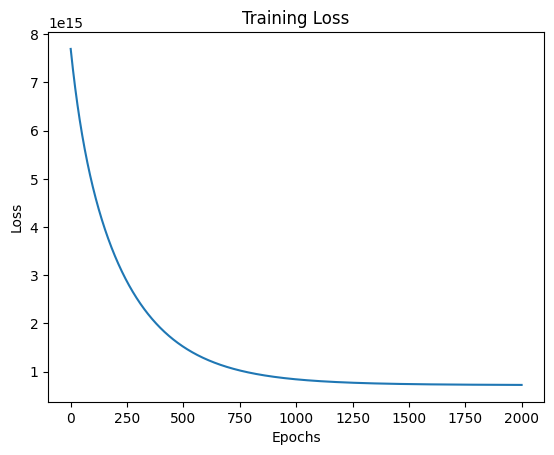

In [58]:
test_loss = loss(y(x_test,a,b),y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(range(epochs),train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [2]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 5       3       0       5       2       

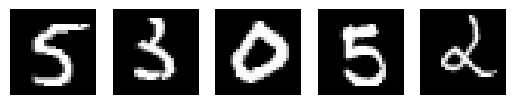

In [4]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [8]:
# Flatten the images into 1-d vectors

x_train_flatten =x_train.reshape(x_train.shape[0],28,28)                                       # flatten the images of training set
x_test_flatten =x_test.reshape(x_test.shape[0],28,28)                                      # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation =x_train_flatten[0:n_validation]
y_validation =y_train[0:n_validation]

x_train_flatten =x_train_flatten[n_validation:]
y_train =y_train[n_validation:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [9]:
model = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,706 (84.79 KB)

 Trainable params: 21,706 (84.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [10]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
y_validation_one_hot = to_categorical(y_validation, 10)
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

n_epochs = 20              # set number of epochs
batch_size = 1024            # you can tweak with these parametrs
history = model.fit(x_train_flatten,y_train_one_hot,epochs=n_epochs,batch_size=batch_size,validation_data=(x_validation,y_validation_one_hot))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 806ms/step - accuracy: 0.3789 - loss: 8.4741 - val_accuracy: 0.7653 - val_loss: 0.7849
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 715ms/step - accuracy: 0.8070 - loss: 0.6436 - val_accuracy: 0.8838 - val_loss: 0.3927
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 699ms/step - accuracy: 0.9012 - loss: 0.3291 - val_accuracy: 0.9240 - val_loss: 0.2553
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 727ms/step - accuracy: 0.9390 - loss: 0.2034 - val_accuracy: 0.9454 - val_loss: 0.1873
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 715ms/step - accuracy: 0.9552 - loss: 0.1495 - val_accuracy: 0.9543 - val_loss: 0.1585
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 723ms/step - accuracy: 0.9644 - loss: 0.1158 - val_accuracy: 0.9597 - val_loss: 0.1385
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 736ms/step - accuracy: 0.9706 - loss: 0.0986 - val_accuracy: 0.9638 - val_loss: 0.1252
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.9740 - loss: 0.0866 - val_accu

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0730
Loss =  0.05892903357744217
Accuracy =  98.30999970436096 %


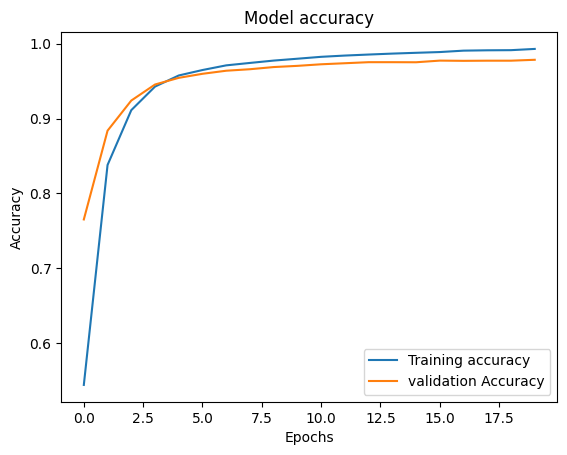

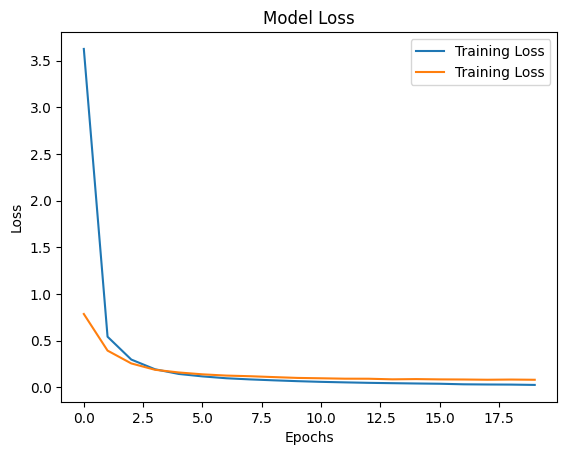

In [15]:
results = model.evaluate(x_test_flatten,y_test_one_hot)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Training Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
       0             1             8             4             3      

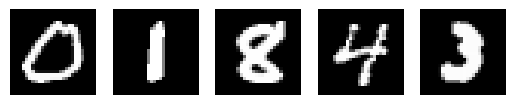

Predicted value: 
       0            1            8            4            3     

In [16]:
n = 5   # = no of images to see predictions on

index = np.random.choice(range(len(x_test)), size=n, replace=False)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print("      ",y_test[ind],end="      ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    image = x_test[ind].reshape(1, 28, 28,1)
    digit = np.argmax(model.predict(image,verbose=0),axis=1)
    print("      ",digit[0],end="     ")